<a href="https://colab.research.google.com/github/SowmyaDontha88/Machine_Learning/blob/main/Supply_chain_cost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(color_codes=True)
pd.set_option('display.max_columns', None)

In [2]:
data = pd.read_csv('/content/supply_chain_data.csv')
data.head(3)

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,Shipping times,Shipping carriers,Shipping costs,Supplier name,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,4,Carrier B,2.956572,Supplier 3,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,2,Carrier A,9.716575,Supplier 3,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,2,Carrier B,8.054479,Supplier 1,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282


# **EDA**

In [3]:
data.columns

Index(['Product type', 'SKU', 'Price', 'Availability',
       'Number of products sold', 'Revenue generated', 'Customer demographics',
       'Stock levels', 'Lead times', 'Order quantities', 'Shipping times',
       'Shipping carriers', 'Shipping costs', 'Supplier name', 'Location',
       'Lead time', 'Production volumes', 'Manufacturing lead time',
       'Manufacturing costs', 'Inspection results', 'Defect rates',
       'Transportation modes', 'Routes', 'Costs'],
      dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product type             100 non-null    object 
 1   SKU                      100 non-null    object 
 2   Price                    100 non-null    float64
 3   Availability             100 non-null    int64  
 4   Number of products sold  100 non-null    int64  
 5   Revenue generated        100 non-null    float64
 6   Customer demographics    100 non-null    object 
 7   Stock levels             100 non-null    int64  
 8   Lead times               100 non-null    int64  
 9   Order quantities         100 non-null    int64  
 10  Shipping times           100 non-null    int64  
 11  Shipping carriers        100 non-null    object 
 12  Shipping costs           100 non-null    float64
 13  Supplier name            100 non-null    object 
 14  Location                 10

In [5]:
data.select_dtypes(include='object').nunique()

Product type               3
SKU                      100
Customer demographics      4
Shipping carriers          3
Supplier name              5
Location                   5
Inspection results         3
Transportation modes       4
Routes                     3
dtype: int64

In [6]:
#Droping SKU Column as it is supply chain id
data.drop(columns=['SKU'], inplace=True)
data.shape

(100, 23)

In [7]:
data.nunique()

Product type                 3
Price                      100
Availability                63
Number of products sold     96
Revenue generated          100
Customer demographics        4
Stock levels                65
Lead times                  29
Order quantities            61
Shipping times              10
Shipping carriers            3
Shipping costs             100
Supplier name                5
Location                     5
Lead time                   29
Production volumes          96
Manufacturing lead time     30
Manufacturing costs        100
Inspection results           3
Defect rates               100
Transportation modes         4
Routes                       3
Costs                      100
dtype: int64

In [8]:
data.describe()

,Price,Availability,Number of products sold,Revenue generated,Stock levels,Lead times,Order quantities,Shipping times,Shipping costs,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Defect rates,Costs
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000
mean,49.462461,48.400000,460.990000,5776.048187,47.770000,15.960000,49.220000,5.750000,5.548149,17.080000,567.840000,14.77000,47.266693,2.277158,529.245782
std,31.168193,30.743317,303.780074,2732.841744,31.369372,8.785801,26.784429,2.724283,2.651376,8.846251,263.046861,8.91243,28.982841,1.461366,258.301696
min,1.699976,1.000000,8.000000,1061.618523,0.000000,1.000000,1.000000,1.000000,1.013487,1.000000,104.000000,1.00000,1.085069,0.018608,103.916248
25%,19.597823,22.750000,184.250000,2812.847151,16.750000,8.000000,26.000000,3.750000,3.540248,10.000000,352.000000,7.00000,22.983299,1.009650,318.778455
50%,51.239831,43.500000,392.500000,6006.352023,47.500000,17.000000,52.000000,6.000000,5.320534,18.000000,568.500000,14.00000,45.905622,2.141863,520.430444
75%,77.198228,75.000000,704.250000,8253.976921,73.000000,24.000000,71.250000,8.000000,7.601695,25.000000,797.000000,23.00000,68.621026,3.563995,763.078231
max,99.171329,100.000000,996.000000,9866.465458,100.000000,30.000000,96.000000,10.000000,9.929816,30.000000,985.000000,30.00000,99.466109,4.939255,997.413450


In [9]:
data.isnull().sum()

Product type               0
Price                      0
Availability               0
Number of products sold    0
Revenue generated          0
Customer demographics      0
Stock levels               0
Lead times                 0
Order quantities           0
Shipping times             0
Shipping carriers          0
Shipping costs             0
Supplier name              0
Location                   0
Lead time                  0
Production volumes         0
Manufacturing lead time    0
Manufacturing costs        0
Inspection results         0
Defect rates               0
Transportation modes       0
Routes                     0
Costs                      0
dtype: int64

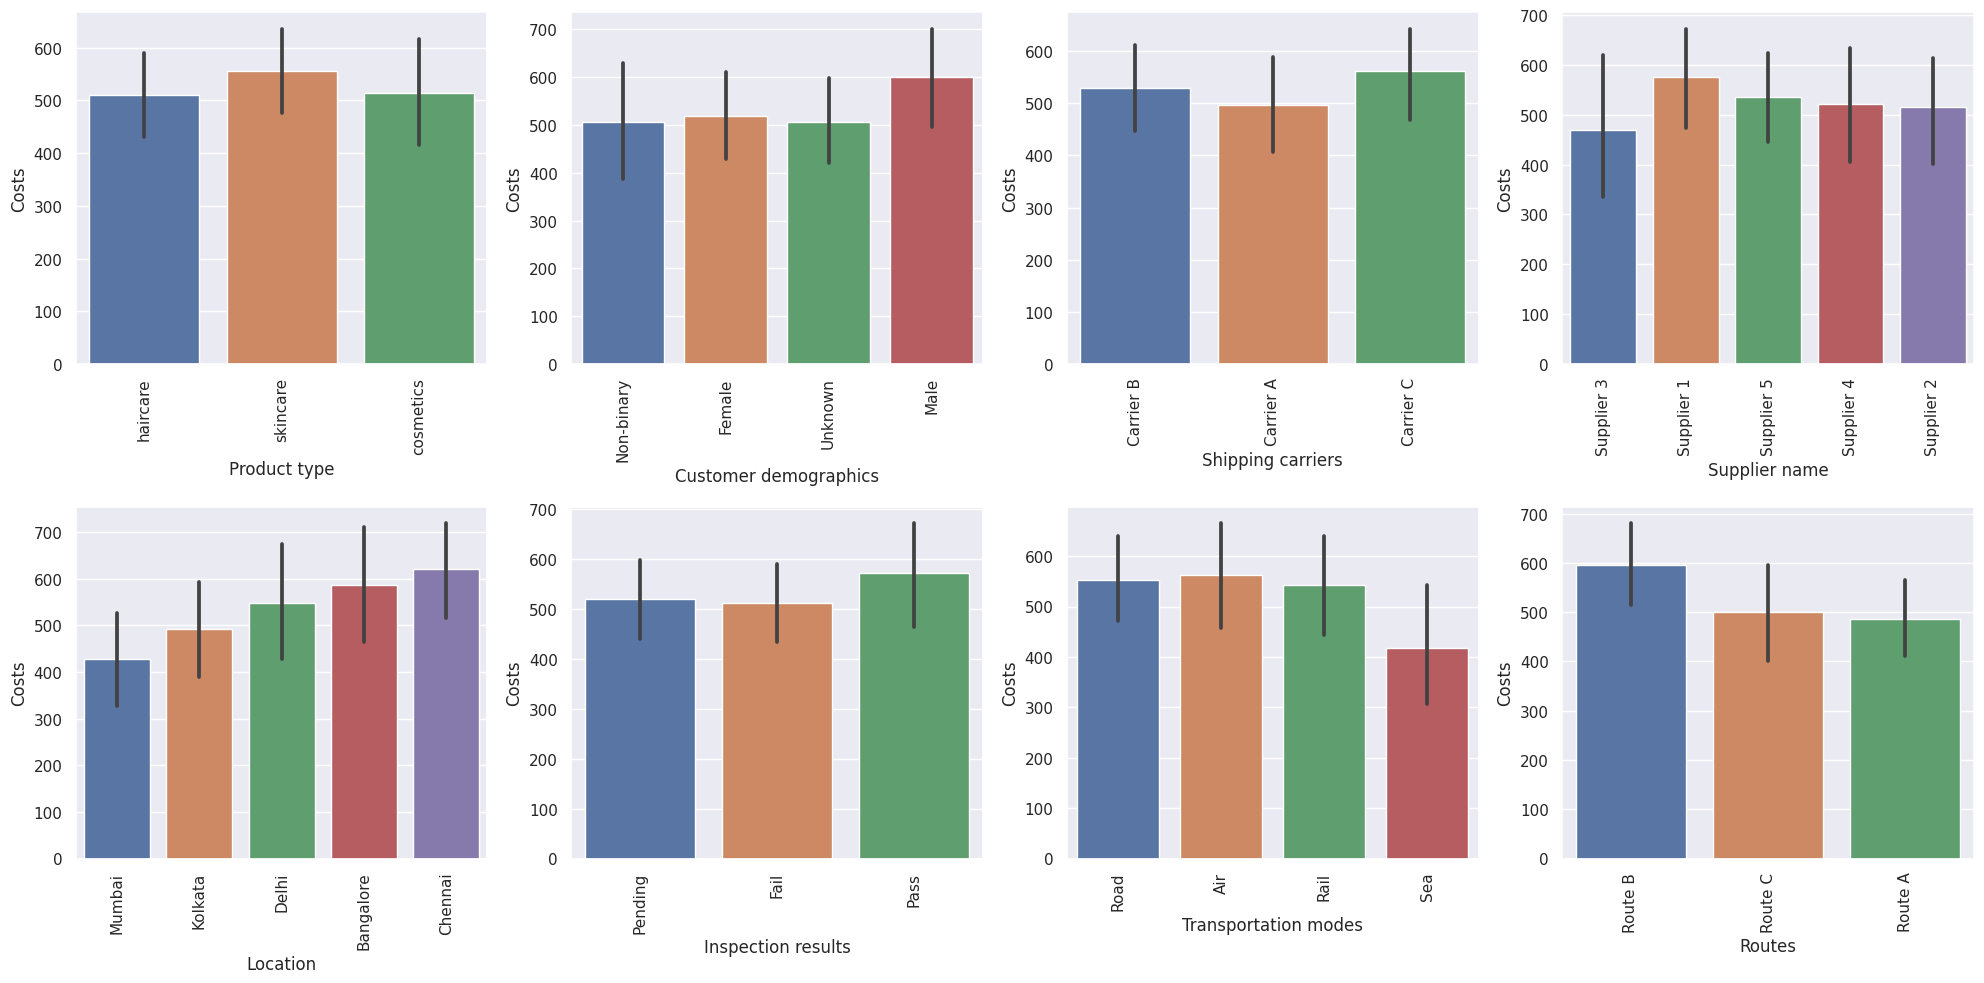

In [10]:
# list of categorical variables to plot
cat_vars = ['Product type', 'Customer demographics', 'Shipping carriers', 'Supplier name', 'Location',
            'Inspection results', 'Transportation modes', 'Routes']

# create figure with subplots
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
axs = axs.flatten()

# create barplot for each categorical variable
for i, var in enumerate(cat_vars):
    sns.barplot(x=var, y='Costs', data=data, ax=axs[i], estimator=np.mean)
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)

# adjust spacing between subplots
fig.tight_layout()

# show plot
plt.show()

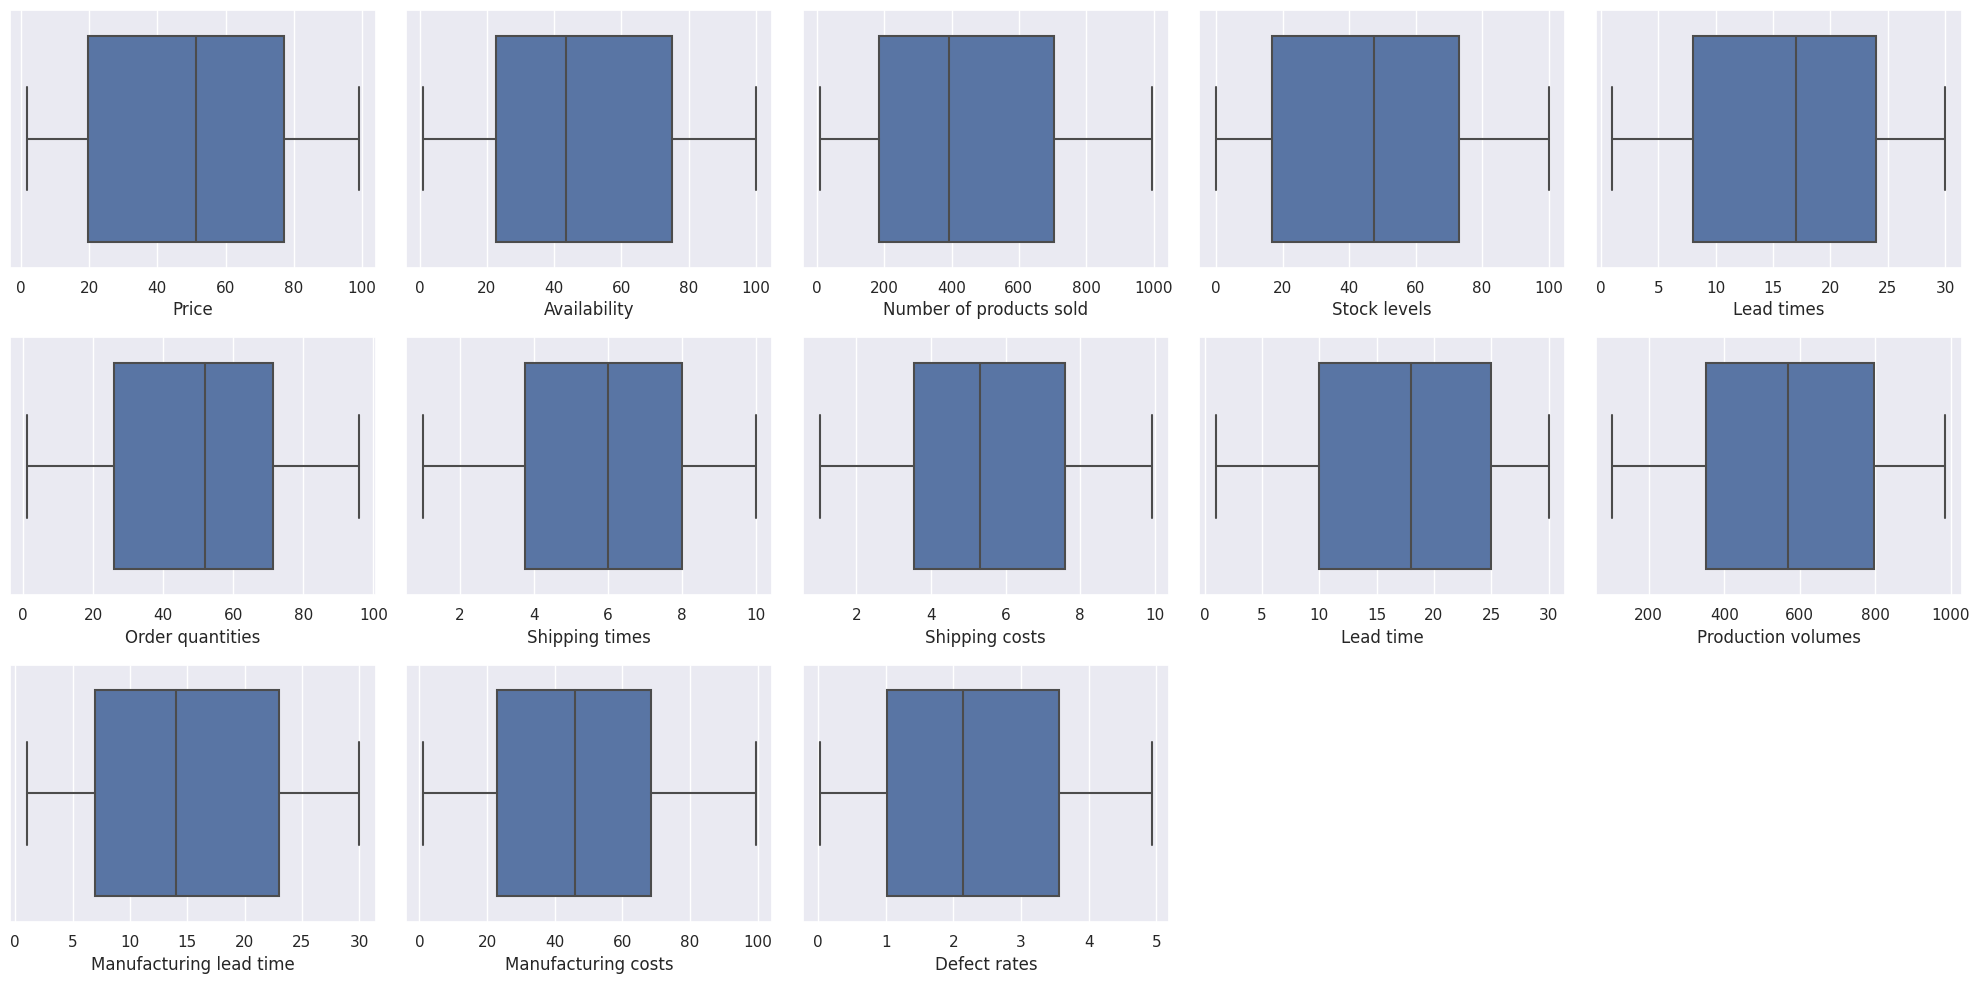

In [11]:
# Checking for outliners using box-plot
num_vars = ['Price', 'Availability', 'Number of products sold', 'Stock levels',
            'Lead times', 'Order quantities', 'Shipping times', 'Shipping costs',
            'Lead time', 'Production volumes', 'Manufacturing lead time', 'Manufacturing costs',
            'Defect rates']

fig, axs = plt.subplots(nrows=3, ncols=5, figsize=(20, 10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.boxplot(x=var, data=data, ax=axs[i])

# remove the 14th subplot
fig.delaxes(axs[13])
# remove the 15th subplot
fig.delaxes(axs[14])

fig.tight_layout()
plt.show()

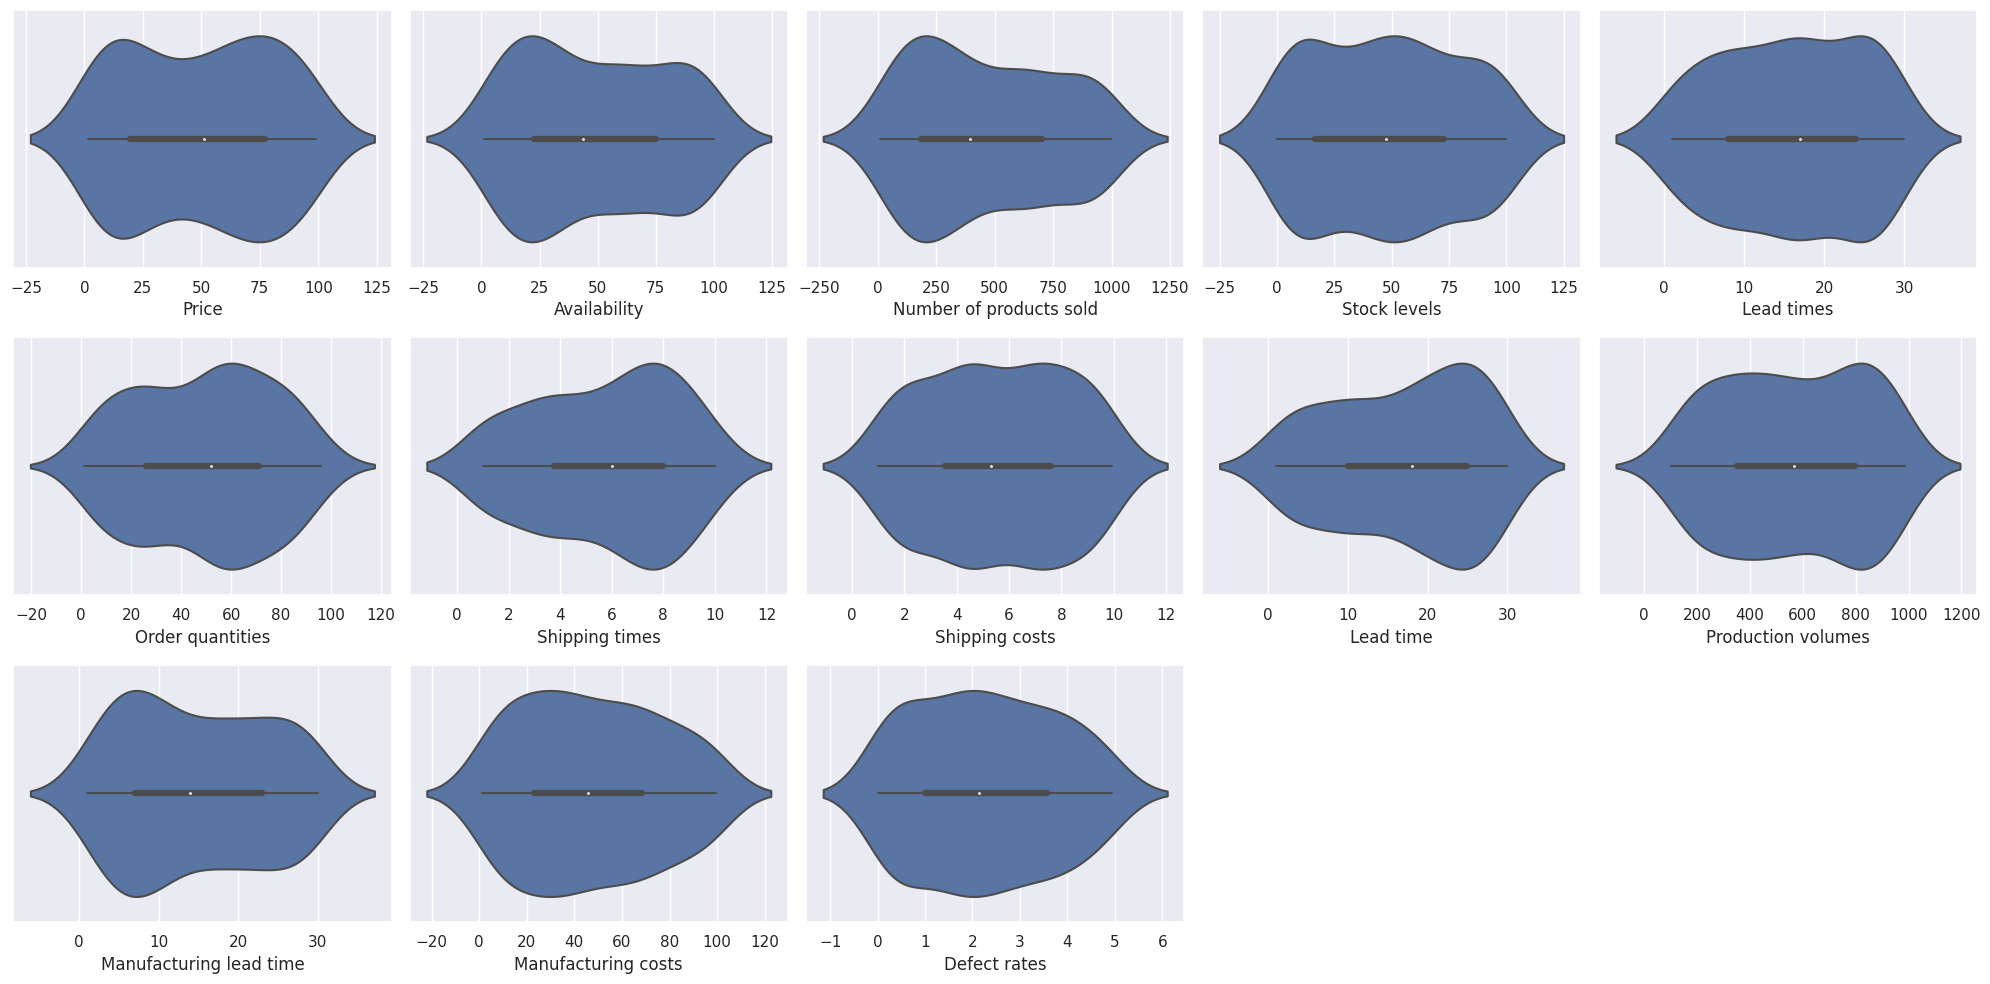

In [12]:
num_vars = ['Price', 'Availability', 'Number of products sold', 'Stock levels',
            'Lead times', 'Order quantities', 'Shipping times', 'Shipping costs',
            'Lead time', 'Production volumes', 'Manufacturing lead time', 'Manufacturing costs',
            'Defect rates']

fig, axs = plt.subplots(nrows=3, ncols=5, figsize=(20, 10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.violinplot(x=var, data=data, ax=axs[i])

# remove the 14th subplot
fig.delaxes(axs[13])
# remove the 15th subplot
fig.delaxes(axs[14])

fig.tight_layout()
plt.show()

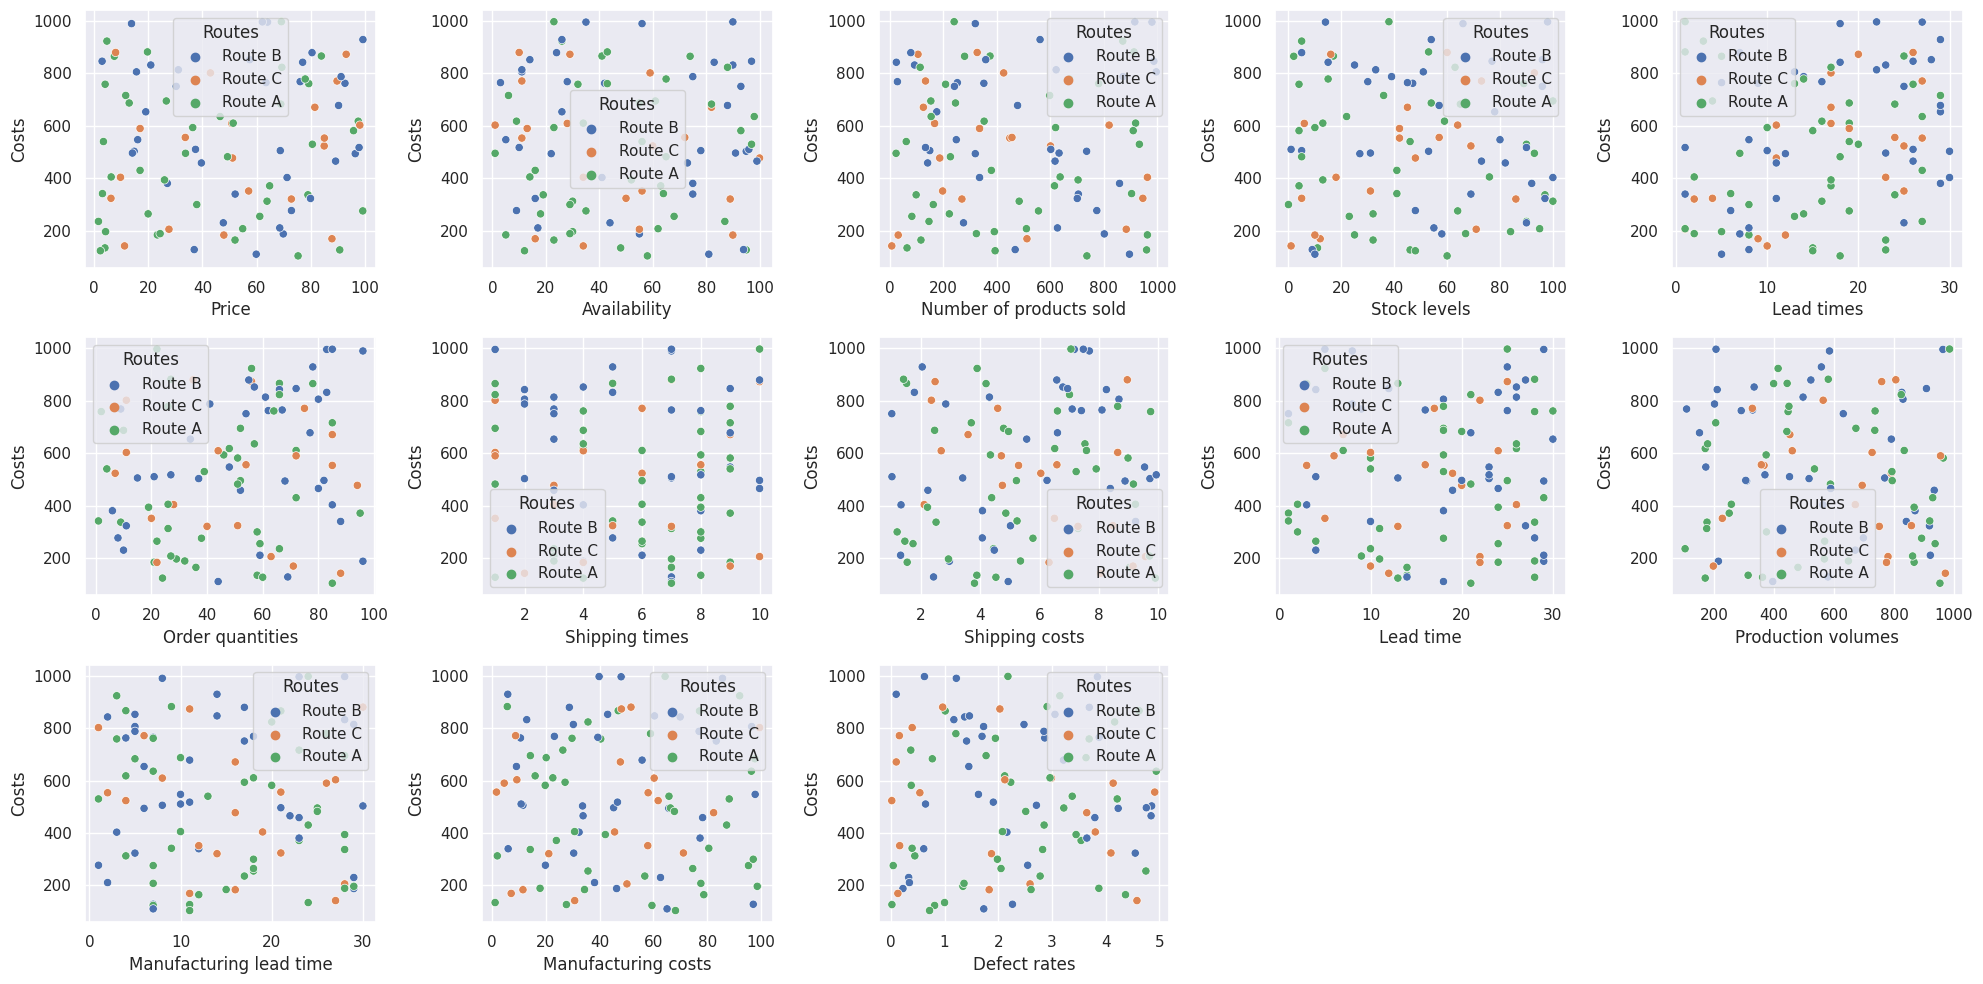

In [13]:
num_vars = ['Price', 'Availability', 'Number of products sold', 'Stock levels',
            'Lead times', 'Order quantities', 'Shipping times', 'Shipping costs',
            'Lead time', 'Production volumes', 'Manufacturing lead time', 'Manufacturing costs',
            'Defect rates']

fig, axs = plt.subplots(nrows=3, ncols=5, figsize=(20, 10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.scatterplot(x=var, y='Costs', hue='Routes', data=data, ax=axs[i])

# remove the 14th subplot
fig.delaxes(axs[13])
# remove the 15th subplot
fig.delaxes(axs[14])

fig.tight_layout()

plt.show()

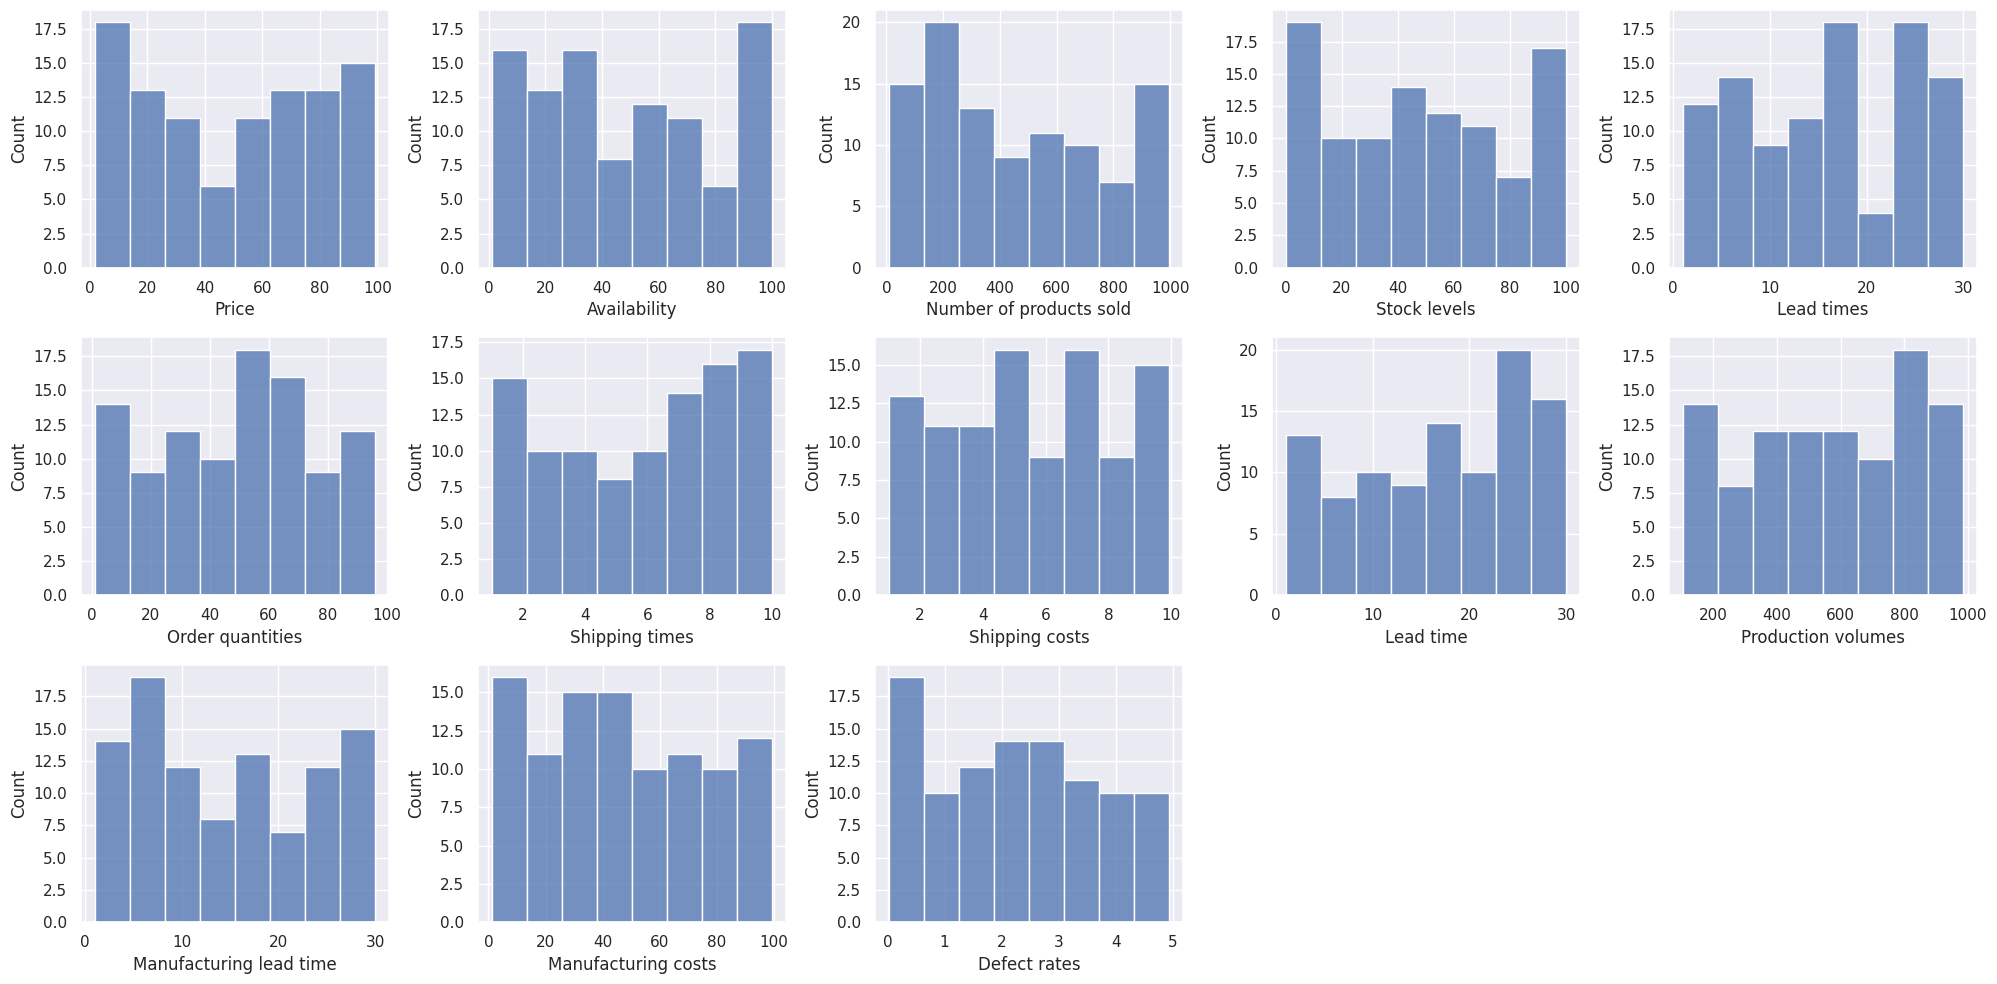

In [14]:
num_vars = ['Price', 'Availability', 'Number of products sold', 'Stock levels',
            'Lead times', 'Order quantities', 'Shipping times', 'Shipping costs',
            'Lead time', 'Production volumes', 'Manufacturing lead time', 'Manufacturing costs',
            'Defect rates']

fig, axs = plt.subplots(nrows=3, ncols=5, figsize=(20, 10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.histplot(x=var, data=data, ax=axs[i])

# remove the 14th subplot
fig.delaxes(axs[13])
# remove the 15th subplot
fig.delaxes(axs[14])

fig.tight_layout()
plt.show()

# **Label Encoding**

In [15]:
# Loop over each column in the DataFrame where dtype is 'object'
for col in data.select_dtypes(include=['object']).columns:

    # Print the column name and the unique values
    print(f"{col}: {data[col].unique()}")

Product type: ['haircare' 'skincare' 'cosmetics']
Customer demographics: ['Non-binary' 'Female' 'Unknown' 'Male']
Shipping carriers: ['Carrier B' 'Carrier A' 'Carrier C']
Supplier name: ['Supplier 3' 'Supplier 1' 'Supplier 5' 'Supplier 4' 'Supplier 2']
Location: ['Mumbai' 'Kolkata' 'Delhi' 'Bangalore' 'Chennai']
Inspection results: ['Pending' 'Fail' 'Pass']
Transportation modes: ['Road' 'Air' 'Rail' 'Sea']
Routes: ['Route B' 'Route C' 'Route A']


In [16]:
from sklearn import preprocessing

# Loop over each column in the DataFrame where dtype is 'object'
for col in data.select_dtypes(include=['object']).columns:

    # Initialize a LabelEncoder object
    label_encoder = preprocessing.LabelEncoder()

    # Fit the encoder to the unique values in the column
    label_encoder.fit(data[col].unique())

    # Transform the column using the encoder
    data[col] = label_encoder.transform(data[col])

    # Print the column name and the unique encoded values
    print(f"{col}: {data[col].unique()}")

Product type: [1 2 0]
Customer demographics: [2 0 3 1]
Shipping carriers: [1 0 2]
Supplier name: [2 0 4 3 1]
Location: [4 3 2 0 1]
Inspection results: [2 0 1]
Transportation modes: [2 0 1 3]
Routes: [1 2 0]


# **Correlation**

<Figure size 3500x2500 with 0 Axes>

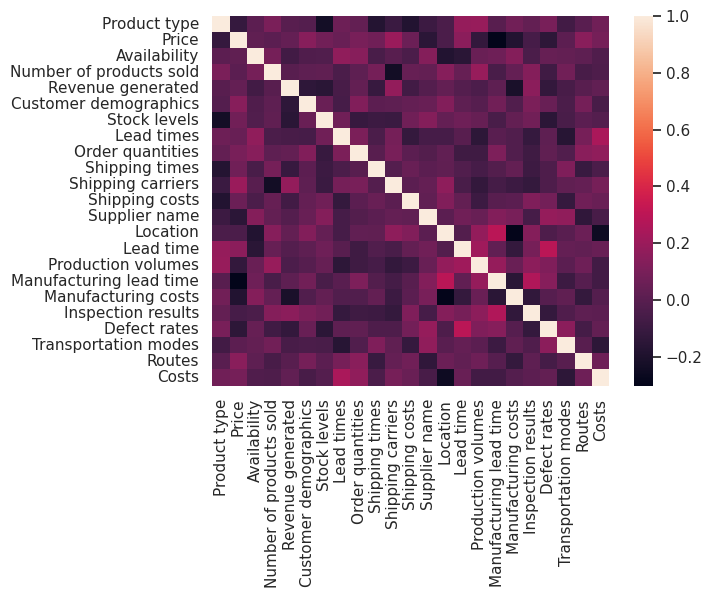

<Figure size 3500x2500 with 0 Axes>

In [24]:
sns.heatmap(data.corr(), fmt='.2g')
plt.figure(figsize=(35,25))

# **Model Building**

In [25]:
X = data.drop('Costs', axis=1)
y = data['Costs']

In [26]:
#test size 20% and train size 80%
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=0)

# **Decision Tree Regressor**

In [29]:
import warnings
warnings.filterwarnings('ignore')

In [30]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()


# Create a DecisionTreeRegressor object
dtree = DecisionTreeRegressor()

# Define the hyperparameters to tune and their values
param_grid = {
    'max_depth': [2, 4, 6, 8],
    'min_samples_split': [2, 4, 6, 8],
    'min_samples_leaf': [1, 2, 3, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'random_state': [0, 7, 42]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(dtree, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)

{'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 2, 'random_state': 0}


In [31]:
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor(random_state=0, max_depth=2, max_features='sqrt', min_samples_leaf=3, min_samples_split=2)
dtree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2, max_features='sqrt', min_samples_leaf=3,
                      random_state=0)

In [32]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_percentage_error
import math
y_pred = dtree.predict(X_test)
mae = metrics.mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
rmse = math.sqrt(mse)

print('MAE is {}'.format(mae))
print('MAPE is {}'.format(mape))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print('RMSE score is {}'.format(rmse))

MAE is 248.4413893861546
MAPE is 0.5893818876444419
MSE is 72806.47766651674
R2 score is -0.08647889188367719
RMSE score is 269.8267549123266


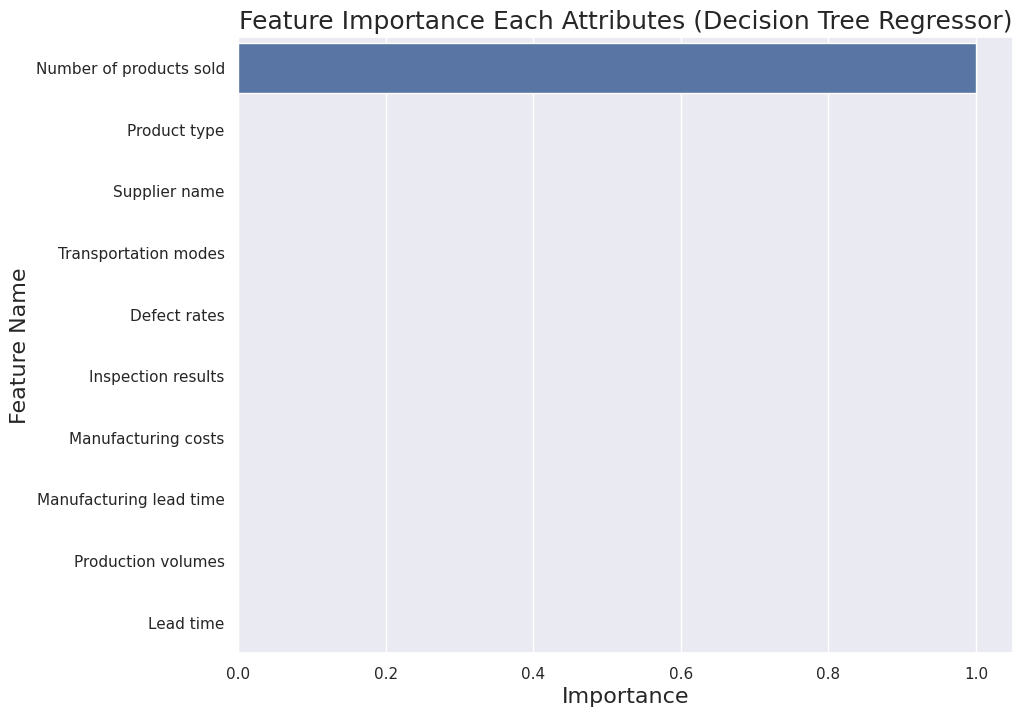

In [33]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": dtree.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Feature Importance Each Attributes (Decision Tree Regressor)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

# **Random Forest Regressor**

In [35]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Create a Random Forest Regressor object
rf = RandomForestRegressor()

# Define the hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'],
    'random_state': [0, 7, 42]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='r2')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters: ", grid_search.best_params_)

Best hyperparameters:  {'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'random_state': 0}


In [36]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=0, max_depth=3, min_samples_split=5, min_samples_leaf=2,
                           max_features='sqrt')
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=3, max_features='sqrt', min_samples_leaf=2,
                      min_samples_split=5, random_state=0)

In [37]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_percentage_error
import math
y_pred = rf.predict(X_test)
mae = metrics.mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
rmse = math.sqrt(mse)

print('MAE is {}'.format(mae))
print('MAPE is {}'.format(mape))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print('RMSE score is {}'.format(rmse))

MAE is 247.33969719962744
MAPE is 0.6029768224226728
MSE is 71899.28833186119
R2 score is -0.07294105713825938
RMSE score is 268.14042651540103


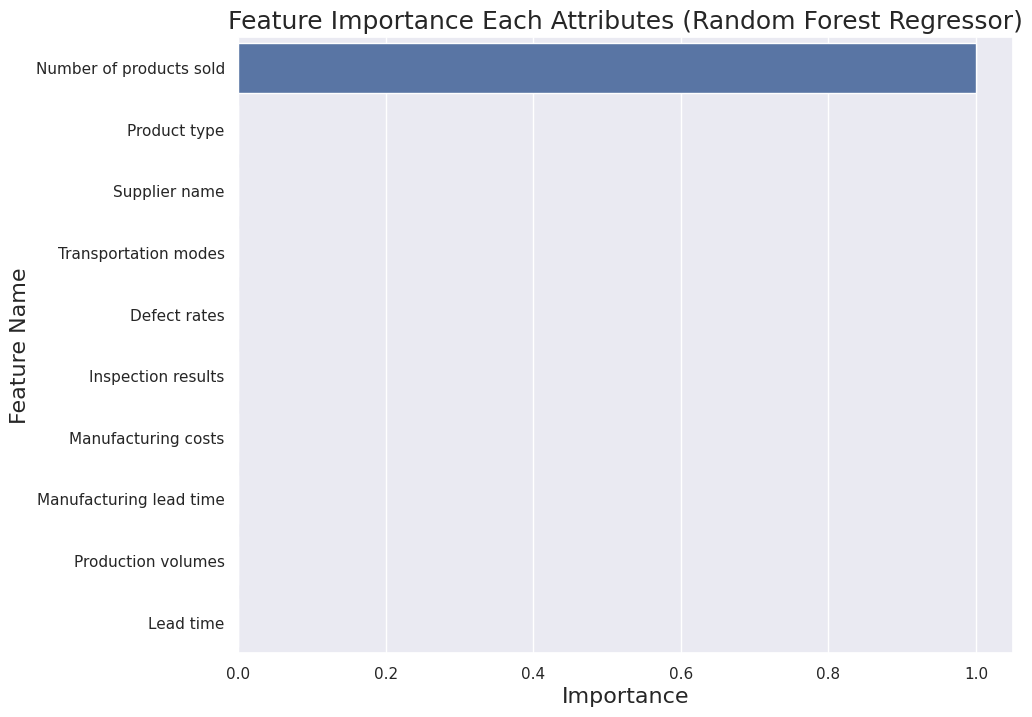

In [38]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": dtree.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Feature Importance Each Attributes (Random Forest Regressor)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

# **AdaBoost Regressor**

In [39]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV

# Create an AdaBoost Regressor object
ada = AdaBoostRegressor()

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.01, 0.1, 1],
    'loss': ['linear', 'square', 'exponential'],
    'random_state': [0, 7, 42]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(ada, param_grid, cv=5, scoring='r2')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters: ", grid_search.best_params_)

Best hyperparameters:  {'learning_rate': 1, 'loss': 'linear', 'n_estimators': 50, 'random_state': 7}


In [40]:
from sklearn.ensemble import AdaBoostRegressor
ada = AdaBoostRegressor(random_state=7, n_estimators=50, learning_rate=1, loss='linear')
ada.fit(X_train, y_train)

AdaBoostRegressor(learning_rate=1, random_state=7)

In [41]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_percentage_error
import math
y_pred = ada.predict(X_test)
mae = metrics.mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
rmse = math.sqrt(mse)

print('MAE is {}'.format(mae))
print('MAPE is {}'.format(mape))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print('RMSE score is {}'.format(rmse))

MAE is 255.28612180541396
MAPE is 0.5859844238678936
MSE is 78800.74415400976
R2 score is -0.17593032834538103
RMSE score is 280.71470241868303


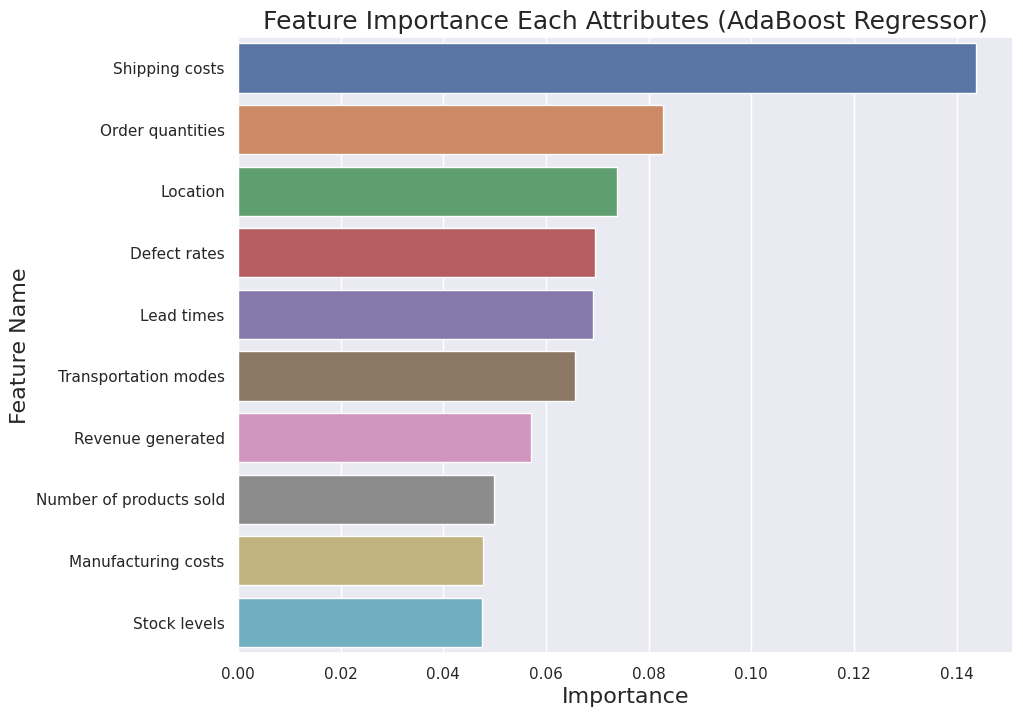

In [42]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": ada.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Feature Importance Each Attributes (AdaBoost Regressor)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()